In [1]:
#setup 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import quantecon as qe  # I will use qe.tic(), qe.toc() from the quantecon library to time the different algorithms.
                        # If you do not have the library, just delete all the qe.tic(), qe.toc()
                        # Or install the library ;)

# The main library for root-finding and optimization!
from scipy import optimize
import time

# Exercise 1 

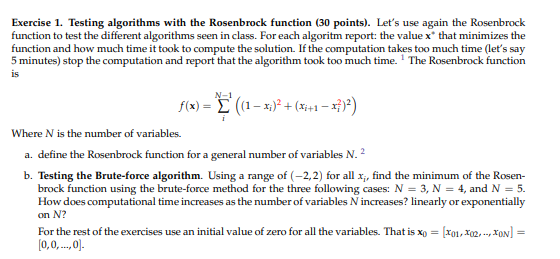



 for N = 3
comp time: 0.08671760559082031
x* =  [0.99998395 0.99996223 0.99992747]

 for N = 4
comp time: 1.438157558441162
x* =  [1.00000306 1.00000682 1.00001735 1.00003738]

 for N = 5
comp time: 27.741744995117188
x* =  [1.00000181 1.0000041  1.00000945 1.00001801 1.00003247]


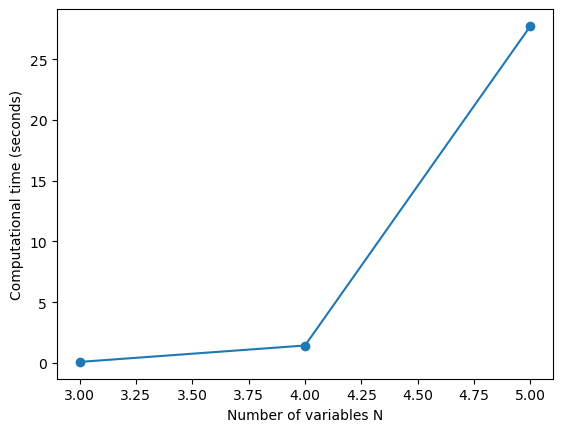

In [2]:
#1a) 
#takes about 30 secs to run 

#source :  https://github.com/cjtonde/optimize_rosenbrock/commit/90c7311df3c1efa7fc5045eb7f052f1fed8bdc7d
def rosen(x):
	"""
		The Rosenbrock's function of N variables
		f(x) =  100*(x_i - x_{i-1}^2)^2 + (1- x_{1-1}^2)
        returns: scalar x 
	"""
	return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


#this one uses a for loop but the above is faster but the computational orders are the same 
# def rosen(x):
#     N = len(x)
#     f = 0
#     for i in range(N-1):
#         f += (1 - x[i])**2.0 + (x[i+1] - x[i]**2.0)**2.0 
#     return f

#1b)
ranges_3 = ((-2,2),(-2,2),(-2,2))
ranges_4 = ((-2,2),(-2,2),(-2,2),(-2,2))
ranges_5 = ((-2,2),(-2,2),(-2,2),(-2,2),(-2,2))
ranges = [ranges_3, ranges_4, ranges_5]
N = [3,4,5]
times = []

for i in range(0,3):
    print('\n for N =', N[i] )
    start_time = time.time()
    x  = optimize.brute(rosen, ranges[i])
    end_time = time.time()
    print('comp time:',end_time - start_time)
    times.append(end_time - start_time)
    print('x* = ', x)

# Plot the computational time as a function of N
plt.plot(N, times, 'o-')
plt.xlabel('Number of variables N')
plt.ylabel('Computational time (seconds)')
plt.show()



### How does computational time increases as the number of variables N increases?

The graph shows: As the number of variables N increases, the computation time increases exponentially. As N increases from 3 to 4, the number of function evaluations required increases by a factor of approximately four. As N increases further from 4 to 5, the number of function evaluations required increases by a factor of approximately 5. This suggests that the computation time required by the brute force algorithm increases exponentially as N increases. This makes sense because the brute force algorithm evaluates the Rosenbrock function at each point in the N-dimensional search space. And the number of points in the search space grows exponentially as N increases. The number of function evaluations required grows exponentially, resulting in a corresponding increase in computation time.


Computational cost with the Rosenbrock function with the brute force method increases exponentially as $N$ increases as it is proportional to the number of functions evaluated. This is because to perform a grid search between $[-2,2]$, the range is discretized into a grid of $M$ points on each dimension. Each input variable is represented by $M$ discrete values. This brings the total number of points tp be evaluated in the grid to $M^{N}$.

#### 1c)
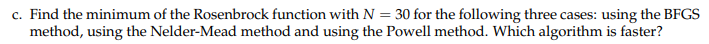

In [3]:
#11seconds run time
x0 = np.zeros(30)
timeBFGS = []
timeNM = []
timePowell = []

# Run each methods 10 times and take the average
for i in range(0,10):
    #BFGS
    time_0 = time.time()
    result1 = optimize.minimize(rosen, x0, method='BFGS')
    time_1 = time.time()
    timeBFGS.append(time_1 - time_0)

    #Nelder Mead
    time_0 = time.time()
    result2 = optimize.minimize(rosen, x0, method='Nelder-Mead')
    time_1 = time.time()
    timeNM.append(time_1 - time_0)

    #Powell
    time_0 = time.time()
    result3 = optimize.minimize(rosen, x0, method='Powell')
    time_1 = time.time()
    timePowell.append(time_1 - time_0)

print('\n Average time for BFGS:', np.mean(timeBFGS))
print('x* = ',result1.x)
print('\n Average time for Nelder Mead:', np.mean(timeNM))
print('x* = ',result2.x)
print('\n Average time for Powell:', np.mean(timePowell))
print('x* = ',result3.x)
print('\n BFGS is the fastest followed by Nelder Mead then Powell method. However, Nelder mead converges to vector of 0s instead of 1')




 Average time for BFGS: 0.17893335819244385
x* =  [0.99999998 0.99999997 0.99999997 0.99999997 0.99999997 0.99999997
 0.99999997 0.99999996 0.99999996 0.99999996 0.99999996 0.99999996
 0.99999996 0.99999997 0.99999996 0.99999997 0.99999995 0.99999996
 0.99999995 0.99999995 0.99999992 0.99999989 0.99999986 0.99999975
 0.99999955 0.99999916 0.99999833 0.99999672 0.99999344 0.99998684]

 Average time for Nelder Mead: 0.23267037868499757
x* =  [ 0.26495387  0.06255477  0.01849677  0.01732798  0.01315194  0.0208077
  0.01691507  0.00414642  0.01598097  0.00758856  0.0103694   0.01353645
  0.00881239  0.00716143  0.01795302 -0.00115939  0.01174748  0.01133551
  0.01678937  0.0123388   0.014804    0.01778937  0.00902711  0.02326934
 -0.00111226  0.00542437  0.0256641  -0.00081119  0.01216932 -0.00566786]

 Average time for Powell: 0.6971124649047852
x* =  [1.00006796 0.9999507  0.99997341 0.99980181 1.00003497 1.00031225
 1.00010033 1.00011    1.0008177  1.00183791 1.0004989  0.99950702
 0.9

#### 1d
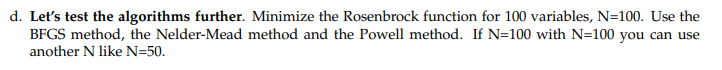

In [4]:
#might be worth it to draw a graph 
# of different Ns(10,20,...,100) against time taken and each method to see how it changes
# nelder mead still converges to 0
x0 = np.zeros(100)
methods =['BFGS', 'Nelder-Mead', 'Powell']

for i in range(0,3):
    print('\n For method:', methods[i])
    t0 = time.time()
    result = optimize.minimize(rosen, x0, method= methods[i])
    t1 = time.time()
    print('time taken for N = 100:', t1 - t0 )

print('now Nelder Mead is the fastest followed by BFGS then Powell')


 For method: BFGS
time taken for N = 100: 2.198873519897461

 For method: Nelder-Mead
time taken for N = 100: 1.1634376049041748

 For method: Powell
time taken for N = 100: 3.021804094314575
now Nelder Mead is the fastest followed by BFGS then Powell


#### 1e)
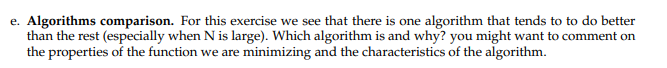

A simplex of N+1 vertices is used by the Nelder-Mead algorithm, a direct search algorithm, to search the search space. The algorithm updates the vertices of the simplex using the values obtained by evaluating the function at each vertex of the simplex at each iteration. On the basis of the function values at the previous vertices, the algorithm then chooses a new vertex to evaluate. In order to determine the minimum of the function, the simplex is iteratively modified.

Another direct search algorithm is the Powell method, which explores the search space using a collection of N linearly independent directions. The algorithm updates the set of directions based on the values at each iteration by evaluating the function along each of the directions.To identify the function's minimum, the algorithm then runs a line search along each direction.

Because it can handle nonlinear constraints by utilizing a set of linearly independent directions that cover the tangent space of the constraints, the Powell approach is typically more successful than gradient-based methods for situations with nonlinear constraints. However, compared to other approaches, it could take more function evaluations for it to converge. The Powell technique is another direct search algorithm, however because the search space is more complex for high-dimensional problems, it might not be as efficient as Nelder-Mead.

Rosebrock function is non smooth and non convex function. Both Nelder-Mead and Powell are effective at minimizing difficult to differentiate non-smooth, non-convex functions, but they have different approaches to exploring the search space and revising their search directions.



# Exercise 2
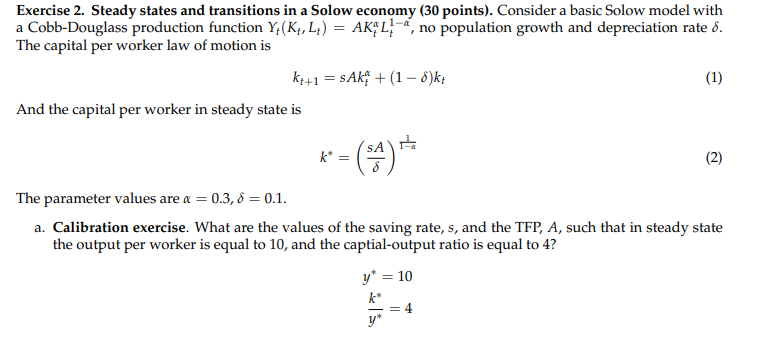

In [5]:
alpha = 0.3
delta = 0.1

def equations(z):
    '''function that contains 2 systems of linear equations ,
    output: [A,s]'''
    A = z[0]
    s = z[1]
    k = (s*A/delta)**(1/(1-alpha))
    eq_1 = A * k**alpha - 10
    eq_2 = k/10 - 4 
    return np.array([eq_1, eq_2])
    
guess = [5,5]
# Solve the system of equations to find steady state values 
result_ss = optimize.fsolve(equations, guess)

print('Savings rate:', round(result_ss[1],2),'\nTFP(A):', round(result_ss[0],2))


Savings rate: 0.4 
TFP(A): 3.31


C:\Users\arifs\AppData\Local\Temp\ipykernel_8276\1236497478.py:9: RuntimeWarning: invalid value encountered in double_scalars
  k = (s*A/delta)**(1/(1-alpha))


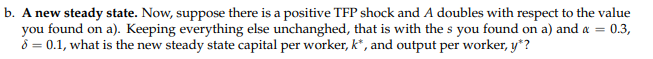

In [6]:
alpha = 0.3
delta = 0.1
#steady state before shock
A = result_ss[0]
s = result_ss[1]

k = round((s*A/delta)**(1/(1-alpha)),2)
Y = round(A * k**alpha,2)
print("The orginal steady state k and y were", k, "and", Y)

#steady state after shock
A2 = 2*result_ss[0]
k = round((s*A2/delta)**(1/(1-alpha)),2)
Y = round(A2 * k**alpha,2) 
print("the new steady state k is", k, "and y is", Y)

The orginal steady state k and y were 40.0 and 10.0
the new steady state k is 107.67 and y is 26.92


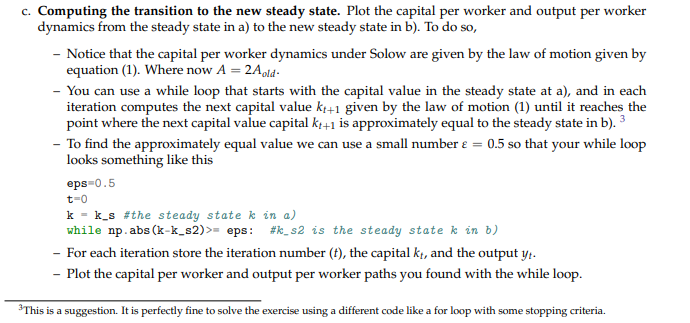

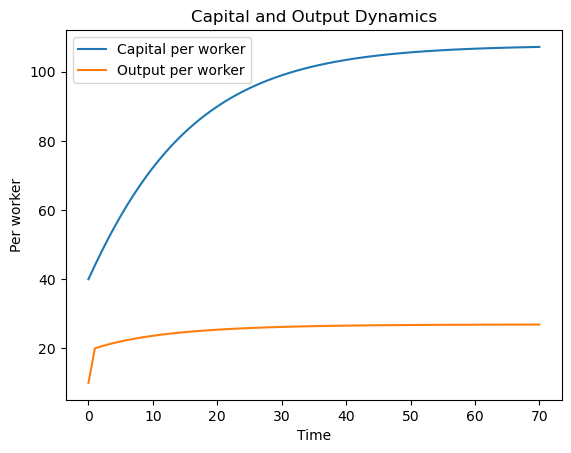

In [7]:
# Define the Solow model with a Cobb-Douglas production function, no population growth and depreciation rate
def solow(k, s, A):
    k_next = ((1 - delta) * k) + (s * A * (k ** alpha))
    y = A * (k ** alpha)
    return k_next, y

# Define the parameters
alpha = 0.3
delta = 0.1
s_star = 0.4
A_star = result_ss[0]
A_star_new = 2 * A_star

# Find the steady state in part (a)
k_star = ((s_star * A_star) / delta) ** (1 / (1 - alpha))
y_star = A_star * (k_star ** alpha)

# Find the steady state in part (b)
k_star_new = ((s_star * A_star_new) / delta) ** (1 / (1 - alpha))
y_star_new = A_star_new * (k_star_new ** alpha)

# Use while loop to generate capital and output paths
eps = 0.5
t = 0
k = k_star
y = y_star
k_path = [k_star]
y_path = [y_star]
while np.abs(k - k_star_new) >= eps:
    k, y = solow(k, s_star, A_star_new)
    t += 1
    k_path.append(k)
    y_path.append(y)

# Plot the capital and output paths
plt.plot(range(t+1), k_path, label='Capital per worker')
plt.plot(range(t+1), y_path, label='Output per worker')
plt.xlabel('Time')
plt.ylabel('Per worker')
plt.title('Capital and Output Dynamics')
plt.legend()
plt.show()

# Exercise 3
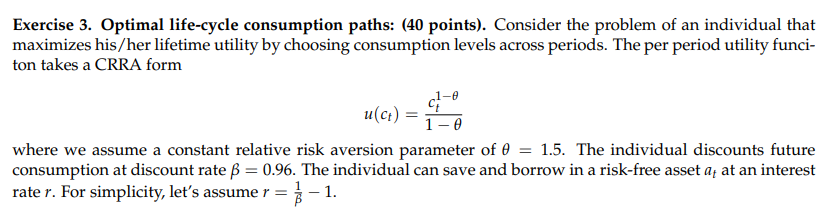
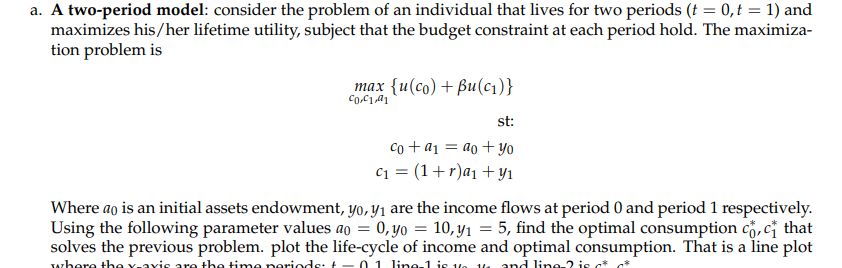





optimal consumption c*_0: [7.55101867] optimal consmption c*_1: [7.55102222]


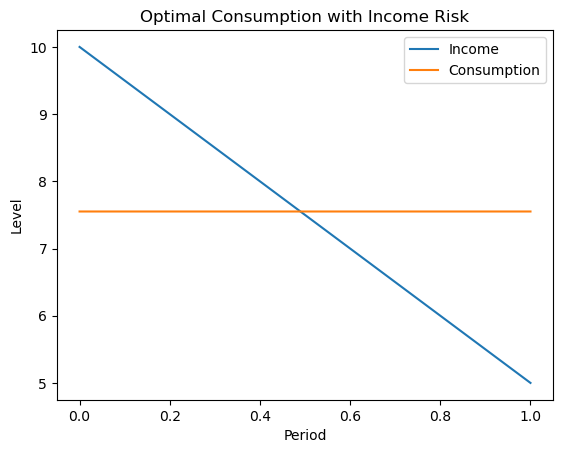

In [8]:
#we shall do this by direct substitution such that, the maximise function only needs to optimise 
#with respect to 1 parameter which is a1 
theta = 1.5
beta = 0.96
r = (1 / beta) - 1 

a0 = 0
y0 = 10 
y1 = 5
#unknowns are c0, c1 and a1

#find the optimal consumption 
def utility_pp(c_t):
    ''' argument:consumption at time t
        output: scalar value u (utility)'''
    theta = 1.5
    u = (c_t**(1- theta) )/ (1-theta)
    return u

    
# new objective function 
def func_2period(a1): #input 1 dimension only a , assume c1 and c0 known
    # c0 = a0 + y0 - a1
    # c1 = (1+r)*a1 + y1
    utility = utility_pp(a0 + y0 - a1) + beta*utility_pp((1+r)*a1 + y1) 
    return -utility # -ve due to maximising 


C = 3 #guess
#below values of c0, c1, a1 maximises the 2 period model 
a1 = optimize.minimize(func_2period,C)
a1 = a1.x

c0 = a0 + y0 - a1
c1 = (1+r)*a1 + y1
print('optimal consumption c*_0:',c0, 'optimal consmption c*_1:', c1 )

#plotting
income = [y0, y1]
consumption = [c0, c1]
plt.plot(range(2), income, label='Income')
plt.plot(range(2), consumption, label='Consumption')
plt.title('Optimal Consumption with Income Risk')
plt.xlabel('Period')
plt.ylabel('Level')
plt.legend()
plt.show()

savings_a = np.array([y0-c0,y1-c1])

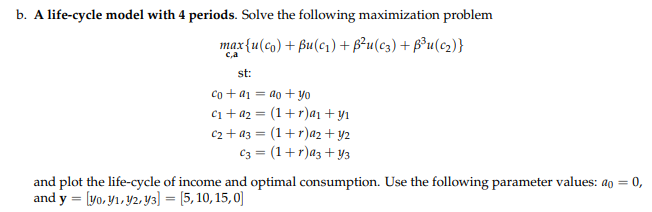

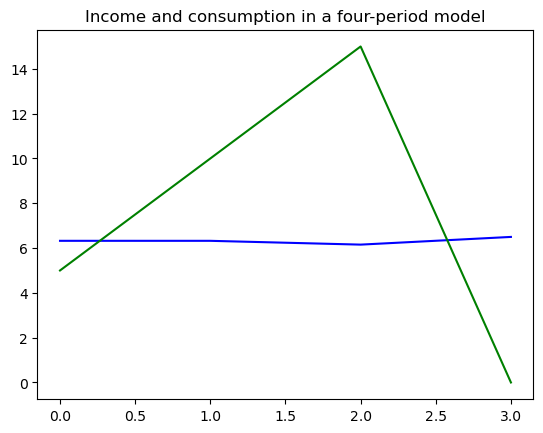

Consumption is [6.32421113 6.32391873 6.1542996  6.49801113] in periods 0 to 4, respectively


In [9]:
def func_4period(a):
    ''' calculates the utility over 4 periods, returns a scalar(utility) '''
    a0, a1, a2, a3 = a[0], a[1], a[2], a[3]
    a0 = 0 #ask albert about this 
    y = np.array([5,10,15,0])
    y0, y1, y2, y3 = y[0], y[1], y[2], y[3]
    # c0 = a0 + y0 - a1
    # c1 = (1+r)*a1 + y1 - a2
    # c2 = (1+r)*a2 + y1 - a3
    # c3 = (1+r)*a3 + y3
    utility = utility_pp(a0 + y0 - a1) + beta*utility_pp((1+r)*a1 + y1 - a2) + beta**2 * utility_pp((1+r)*a3 + y3) + beta**3 * utility_pp((1+r)*a2 + y1 - a3)
    return -utility

guess = np.array([0,3,3,3]) #guess
#below values of c0, c1, a1 maximises the 2 period model 
a = optimize.minimize(func_4period,guess) # should return an array of a*
a = a.x

y = np.array([5,10,15,0])
y0, y1, y2, y3 = y[0], y[1], y[2], y[3]

#direct substitution 
def consumption_subs(a):
    ''' directly substitutes array a* into constraints to return array c*
    returns: (4,1) array c*'''
    y = np.array([5,10,15,0])
    y0, y1, y2, y3 = y[0], y[1], y[2], y[3]
    a0, a1, a2, a3 = a[0], a[1], a[2], a[3]
    c0 = a0 + y0 - a1
    c1 = (1+r)*a1 + y1 - a2
    c2 = (1+r)*a2 + y1 - a3
    c3 = (1+r)*a3 + y3
    c = np.array([c0, c1, c2, c3])
    return(c)

c = consumption_subs(a)
# plotting
t = [0, 1, 2, 3]
y = [y0, y1, y2, y3]
plt.title("Income and consumption in a four-period model")
plt.plot(t, c, color='blue', label='consumption')
plt.plot(t, y, color='green', label='income')
plt.show()

print("Consumption is", c, "in periods 0 to 4, respectively")

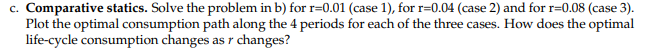

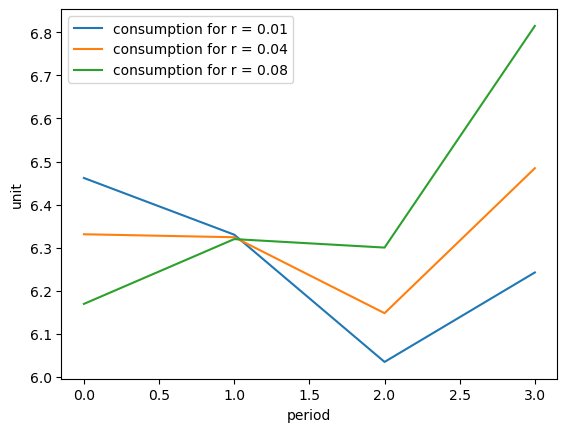

In [10]:
theta = 1.5
beta = 0.96
r_list = [0.01, 0.04, 0.08]

label_c = ['consumption for r = 0.01','consumption for r = 0.04','consumption for r = 0.08']
for i in range(0,3):
    r = r_list[i]
    guess = np.array([0,3,3,3]) #guess
    #below values of c0, c1, a1 maximises the 2 period model 
    a = optimize.minimize(func_4period,guess) 
    a = a.x #a*
    c = consumption_subs(a) #c*
    plt.plot(t, c, label=label_c[i])
    
# plt.plot(t, y, color='green', label='income')  
plt.legend()
plt.xlabel('period')
plt.ylabel('unit')
plt.show()  

we can expect that the consumption levels will increase as r increases, as higher interest rates provide a greater incentive to save and accumulate wealth, which can then be used to increase consumption in future periods.

Our graph does not follow the rationale at $t=0$. Then, at $t=1$ consumption is approximately equal for all 3 rates. at $t=2$ and onwards our observations indeed follow economic theory.

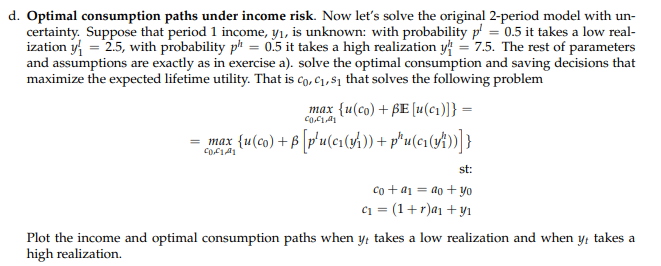

optimal c0,c1,s0,s1 under income risk:  [7.08616596] [7.8352438] [2.91383404] [-3.0352438] 

optimal Consumption for low realisation for c_0 and c_1: [[6.3265881 ]
 [6.32647073]]
optimal savings for low realisation for s_0 and s_1: [[ 3.6734119 ]
 [-3.82647073]]
optimal Consumption for high realisation for c_0 and c_1: [[8.77551194]
 [8.7755084 ]]
optimal savings for high realisation for s_0 and s_1: [[ 1.22448806]
 [-1.2755084 ]]


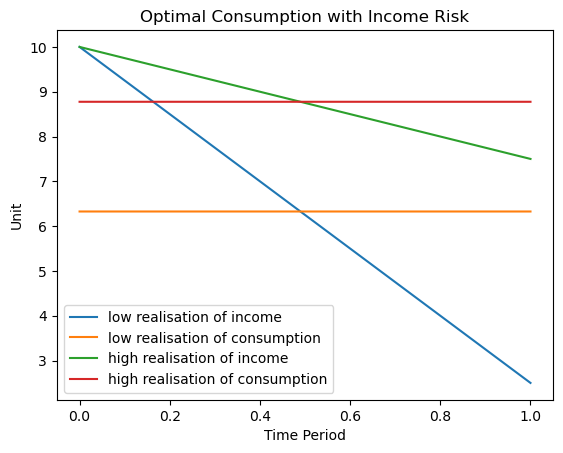

In [11]:
# Define parameters
theta = 1.5
beta = 0.96
r = 1 / beta - 1
yl = 2.5
yh = 7.5
pl = 0.5
ph = 0.5
y0 = 10
a0 = 0

def func_2period_hl(a1): # equation with expectations of high and low
    # c0 = a0 + y0 - a1
    # c1 = (1+r)*a1 + y1
    utility = utility_pp(a0 + y0 - a1) + beta* (pl * utility_pp((1+r)*a1 + yl) + ph * utility_pp((1+r)*a1 + yh)) 
    return -utility # -ve due to maximising 

def func_2period_low(a1): #to illustrate low realisation we assume p^l = 1 and p^h = 0
    utility = utility_pp(a0 + y0 - a1) + beta* (utility_pp((1+r)*a1 + yl) )
    c1_l = (1+r)*a1 + yl
    return -utility 

def func_2period_high(a1): #to illustrate low realisation we assume p^l = 0 and p^h = 1
    utility = utility_pp(a0 + y0 - a1) + beta* utility_pp((1+r)*a1 + yh)
    return -utility


C = 3 #guess
#value of a1 maximises the 2 period model 
a1 = optimize.minimize(func_2period_hl,C)
a1 = a1.x
Ey1 = beta * (pl*yl + ph*yh) #expected income in period 2 
#direct substitution
c0 = a0 + y0 - a1
c1 = (1+r)*a1 + Ey1
s0 = y0 - c0
s1= Ey1 - c1 
savings_d = np.array([s0, s1])
print('optimal c0,c1,s0,s1 under income risk: ',c0, c1, s0, s1, '\n')


#labels 
func_list = [ func_2period_low, func_2period_high]
y1vals = [yl, yh]
income_labels = ['low realisation of income', 'high realisation of income']
consumption_labels = ['low realisation of consumption', 'high realisation of consumption']
l1 = ['optimal Consumption for low realisation for c_0 and c_1:', 'optimal Consumption for high realisation for c_0 and c_1:']
l2 = ['optimal savings for low realisation for s_0 and s_1:', 'optimal savings for high realisation for s_0 and s_1:']

#func evals and plotting 
for i in range(0,2):
    C = 3 #guess
    #value of a1 maximises the 2 period model 
    a1 = optimize.minimize(func_list[i],C)
    a1 = a1.x
    #direct substitution
    c0 = a0 + y0 - a1
    c1 = (1+r)*a1 + y1vals[i]
    income = np.array([y0, y1vals[i]])
    consumption = np.array([c0, c1])
    savings = np.array([y0 - c0, y1vals[i]-c1])
    print(l1[i], consumption)
    print(l2[i], savings)
    #savings = income at period t - consumption at period t

    plt.plot(range(2), income, label=income_labels[i])
    plt.plot(range(2), consumption, label=consumption_labels[i])

plt.title('Optimal Consumption with Income Risk')
plt.xlabel('Time Period')
plt.ylabel('Unit')
plt.legend()
plt.show()

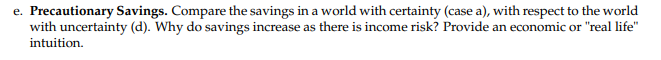

In [12]:
#savings in a and d  [s0, s1]
print('savings in s_0 and s_1 in (a)', savings_a)
print('savings in s_0 and s_1 in (d)', savings_d)

perc_increase = (savings_d[0] -savings_a[0])/savings_a[0]
print('percentage increase with risk :', perc_increase)

savings in s_0 and s_1 in (a) [[ 2.44898133]
 [-2.55102222]]
savings in s_0 and s_1 in (d) [[ 2.91383404]
 [-3.0352438 ]]
percentage increase with risk : [0.18981472]


In the world with certainty $(a)$, the savings are $2.45$, but when we model a world with uncertainty $(d)$, there is an increase in savings of roughly $19 \%$: savings increases to $2.91$.
This is a phenomenon we also see in real life: economic conditions such as total income or economic stability play an important role in determining the saving rate. People tend to decrease consumption in order to prepare themselves for any uncertain future.
Depending on risk aversion parameter $\theta$, the consumption smoothing will be considered more or less valuable: if $\theta$ is low, they do not value smoothness that much so they will react strongly relative to the rate of return, increasing or decreasing consumption sharply. On the other hand, if theta is high, they prefer a smooth consumption so they will react less to the rate of return.


Intuitively, in the certain case with no risks $(a)$, one does not have to save as much but if there is a good chance you will have your income drastically fall for example losing once job or accidents, one would rather save more and have a smooth lifecycle graph because that gives higher utility.